In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [18]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [19]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Feature selection

Feature ranking:
1. feature Clean sheets (0.041)
2. feature Assists (0.041)
3. feature Big Chances Created (0.030)
4. feature Passes (0.028)
5. feature Blocked shots (0.028)
6. feature Goals (0.027)
7. feature Goals Conceded (0.023)
8. feature Shots on target (0.023)
9. feature Goals with right foot (0.022)
10. feature Big chances missed (0.022)
11. feature Hit woodwork (0.021)
12. feature Cross accuracy % (0.021)
13. feature Tackle success % (0.020)
14. feature Shots (0.020)
15. feature Accurate long balls (0.020)
16. feature Goals with left foot (0.020)
17. feature Own goals (0.019)
18. feature Sweeper clearances (0.019)
19. feature Penalties scored (0.019)
20. feature Clearances off line (0.019)
21. feature Crosses (0.018)
22. feature Interceptions (0.018)
23. feature Recoveries (0.018)
24. feature Throw outs (0.018)
25. feature Catches (0.018)
26. feature Through balls (0.018)
27. feature Successful 50/50s (0.018)
28. feature Punches (0.018)
29. feature Red cards (0.018)
30. featur

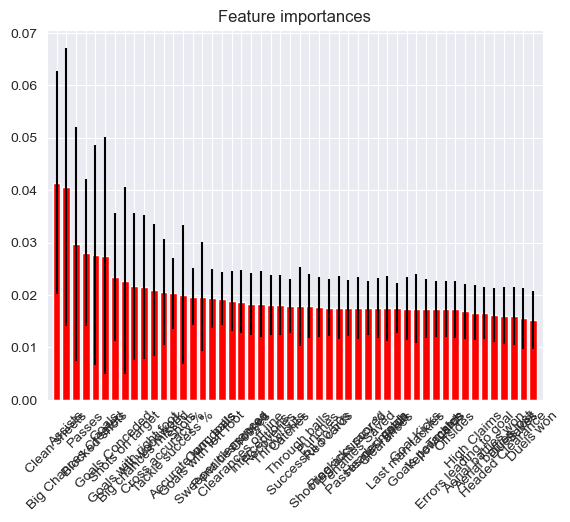

In [20]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [21]:
X=X.drop(columns=X.columns[indices[15:]])

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 15), (2835,), (354, 15), (354,), (355, 15), (355,))

## Decision Tree

In [24]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
clf.score(X_test,y_test)

0.4067796610169492